## Author: Shriansh Jena

# Exploratory Data Analysis - Global Terrorism

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Admin'

### Fetching Data

In [3]:
file_path = 'C:\\Users\\Admin\\Downloads\\globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Interpreting Data

In [4]:
print(df.shape)

(181691, 135)


Observing the dataset, it contains numerous entries and comprises 135 columns. Now, let's examine the column names.

In [5]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


Given that this dataset comprises 135 columns, let's reduce the dataset's size by removing unnecessary columns and selecting the essential ones. Additionally, we can rename the columns to enhance their clarity and understanding.

In [6]:
# Rename columns for clarity
df.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country',
    'provstate': 'State', 'region_txt': 'Region', 'city': 'City', 'latitude': 'Latitude',
    'longitude': 'Longitude', 'attacktype1_txt': 'Attack Type', 'targtype1_txt': 'Target Type',
    'targsubtype1_txt': 'Target Sub Type', 'weaptype1_txt': 'Weapon Type', 'gname': 'Group',
    'nkill': 'Killed', 'nwound': 'Wounded', 'summary': 'Summary', 'motive': 'Motive'
}, inplace=True)

In [7]:
# Select relevant columns
selected_columns = [
    'eventid', 'Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude',
    'Longitude', 'Attack Type', 'Target Type', 'Target Sub Type', 'Suicide', 'Killed',
    'Wounded', 'Summary', 'Group', 'Weapon Type', 'Motive'
]
df = df[selected_columns]

In [8]:
df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack Type,Target Type,Target Sub Type,Suicide,Killed,Wounded,Summary,Group,Weapon Type,Motive
0,1.970000e+11,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,1.970000e+11,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1.970010e+11,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN
3,1.970010e+11,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN
4,1.970010e+11,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [9]:
df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,Suicide,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668
std,1.325955e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000


## Exploratory Data Analysis

### Global Attack Incidents Over the Years

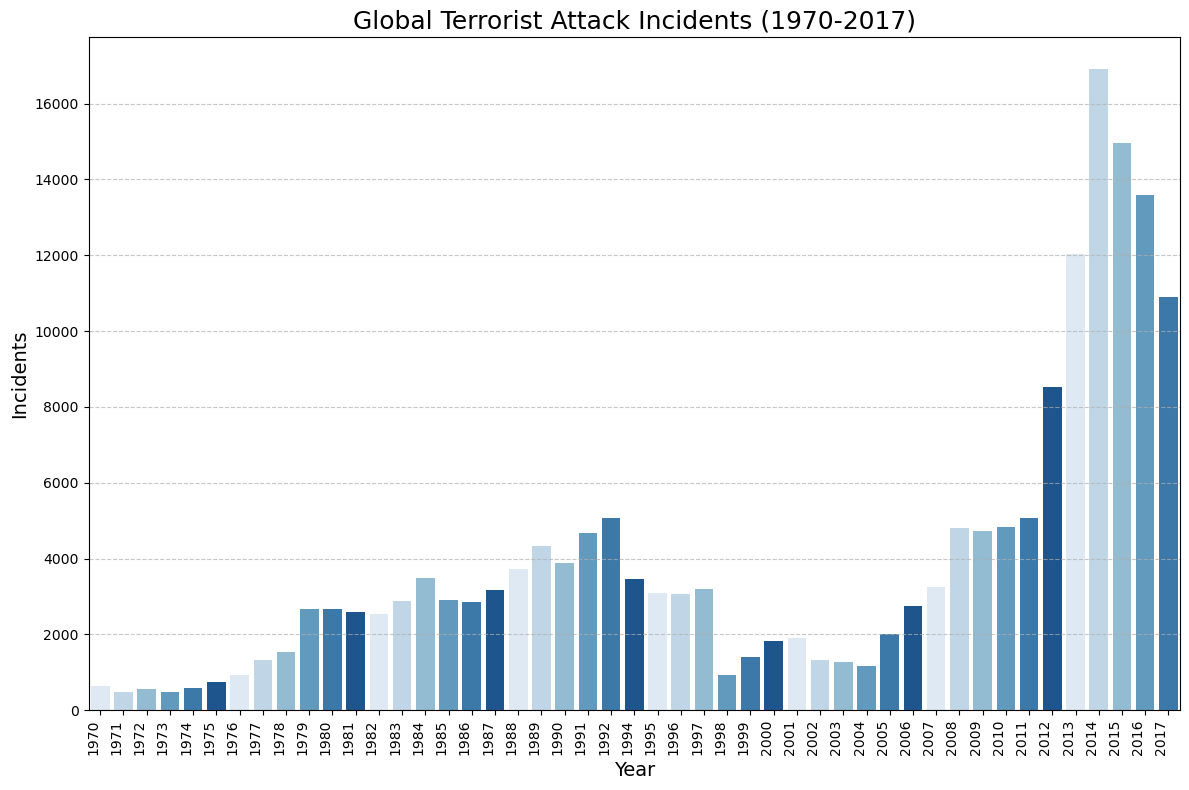

In [10]:
custom_palette = sns.color_palette("Blues") # Setting a custom color palette
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Year', data=df, palette=custom_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents (1970-2017)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here, we can observe a gradual rise in attacks from 1970 to around 1993, followed by a decline in global terrorist incidents until 2003. Afterward, there is a notable surge in the number of attacks/incidents. Notably, 2014 and 2015 stand out with a significant increase in terrorist activities.

### Categories of Terrorist Attacks

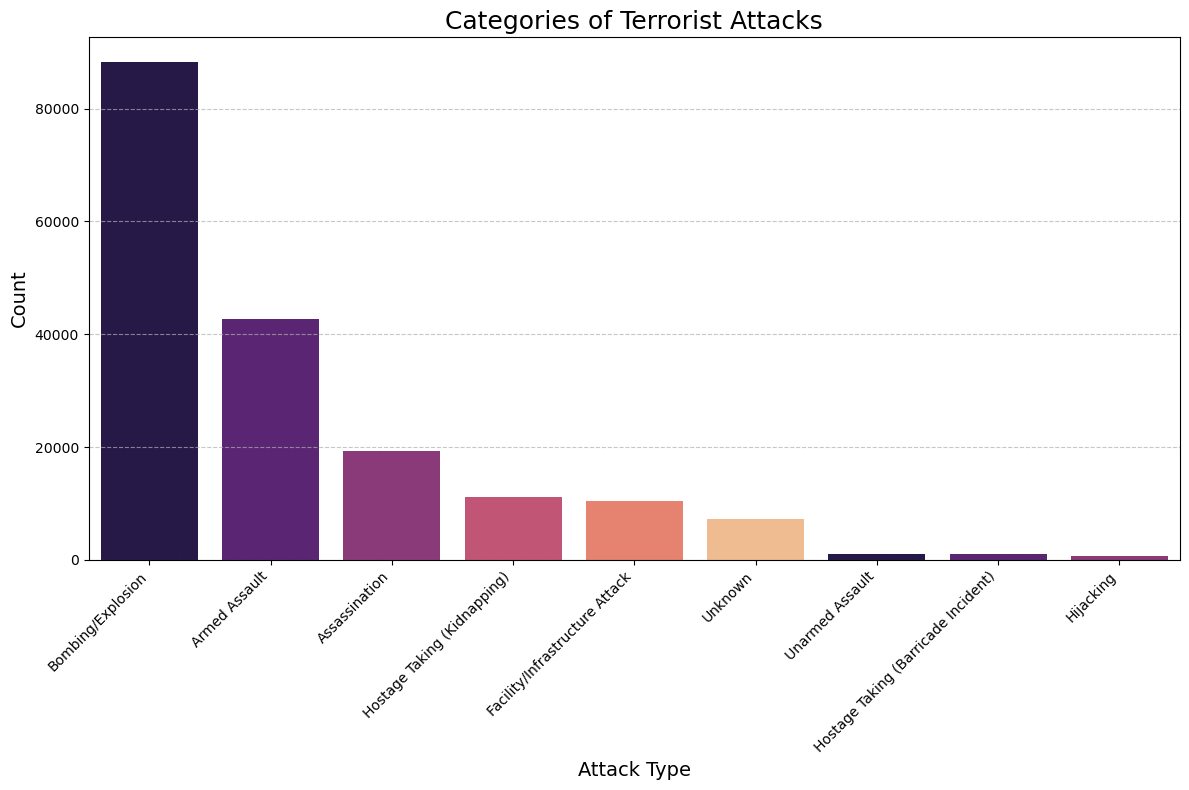

In [11]:
custom_palette = sns.color_palette("magma")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Attack Type', data=df, palette=custom_palette, order=df['Attack Type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Categories of Terrorist Attacks', fontsize=18)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In recent years, the most commonly preferred method of attack has overwhelmingly been bombings, chosen by terrorists more than twice as often as armed assaults. Interestingly, despite its prevalence, hijacking ranks last in terms of frequency.

### Worldwide Bombing Incidents

In [12]:
df_bombing = df[df['Attack Type'] == 'Bombing/Explosion']

<Figure size 1200x800 with 0 Axes>

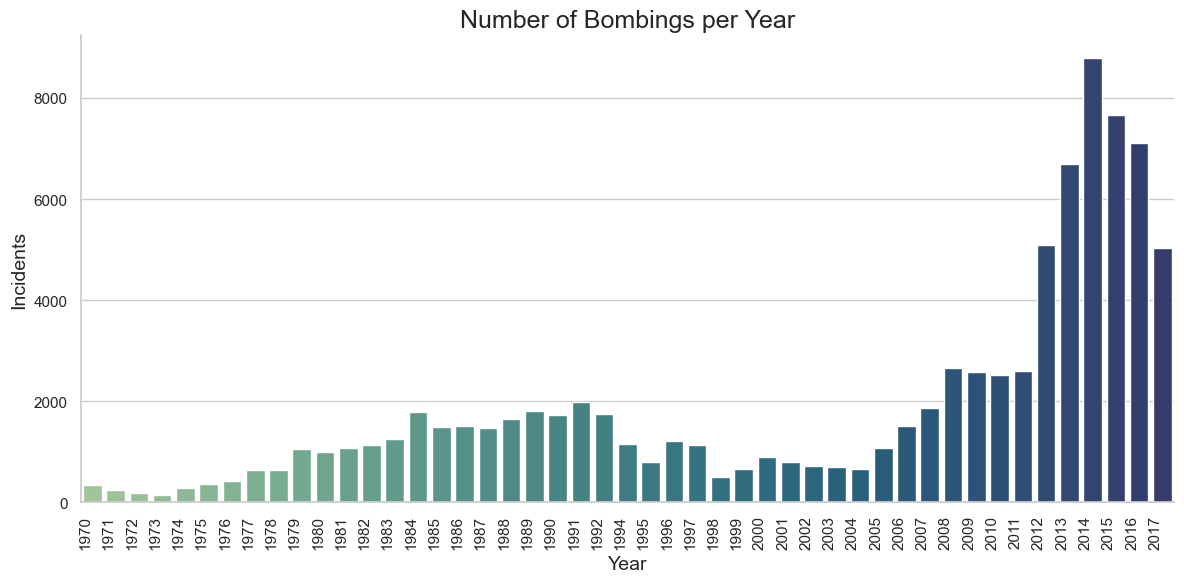

In [13]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  
sns.catplot(x='Year', data=df_bombing, kind='count', height=6, aspect=2, palette='crest')
plt.xticks(rotation=90, ha="right")
plt.title('Number of Bombings per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.tight_layout()
plt.show()

It's apparent that the trend in the number of bombings closely mirrors the global attack trend. However, there's a more pronounced decrease in bombing incidents during the early 90s.

### Terrorist Incidents Across Regions

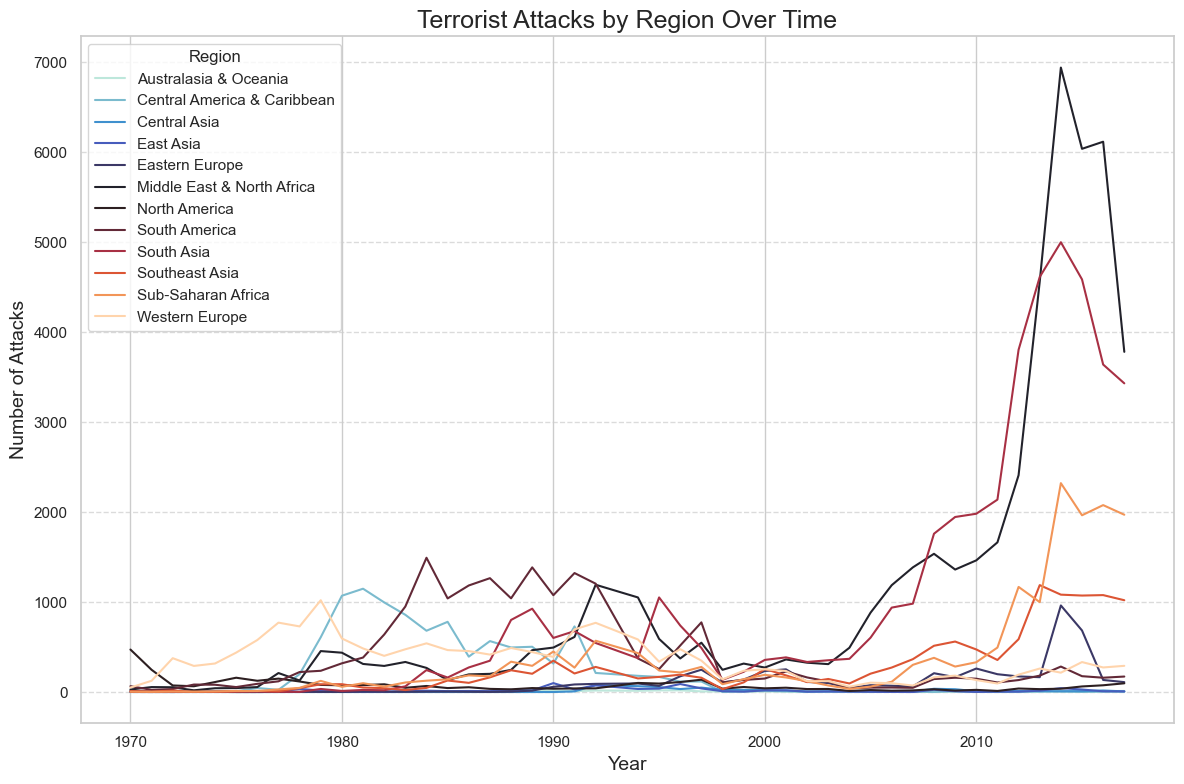

In [14]:
ax = pd.crosstab(df['Year'], df['Region']).plot(figsize=(12, 8), colormap='icefire')
ax.legend(title='Region', title_fontsize=12, loc='upper left')
plt.title('Terrorist Attacks by Region Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here, it becomes quite evident how the general pattern of attacks has evolved over the years in various global regions. It's also noticeable that we encounter a similar surge in attack numbers, with the Middle East and North Africa, along with South Asia, being the most severely affected by terrorist incidents.

### Plot of Target Types

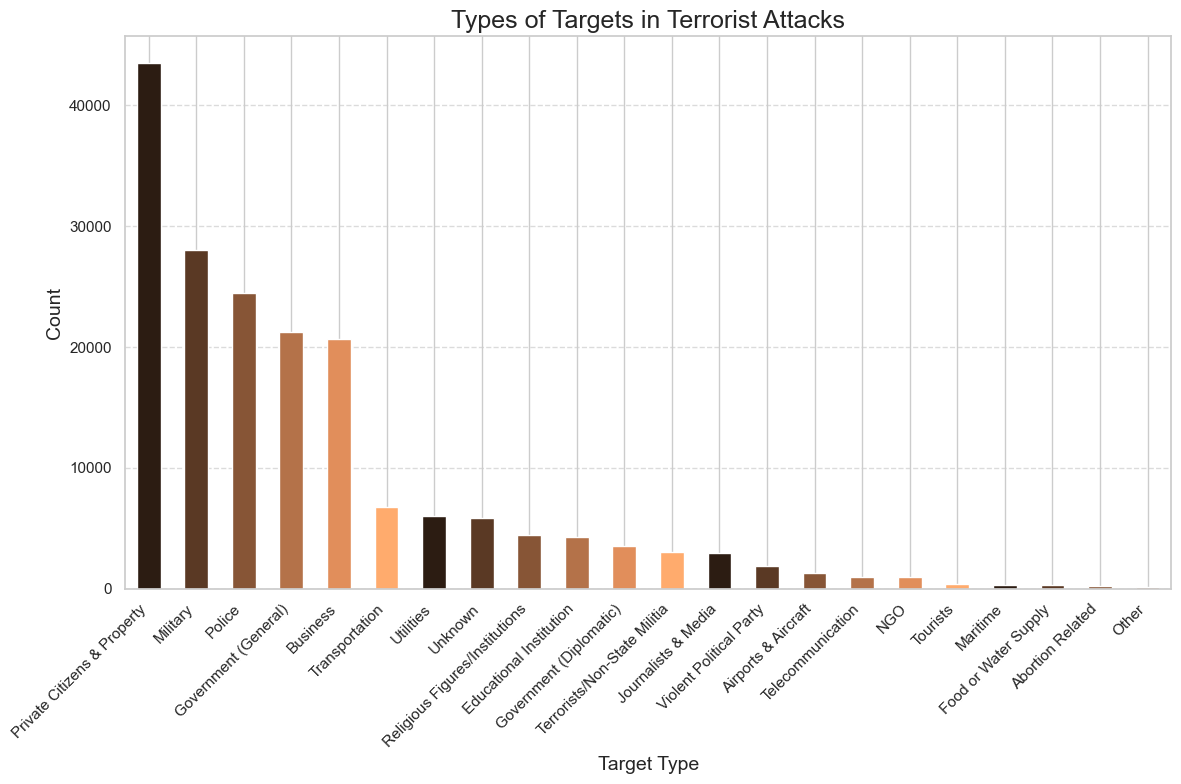

In [15]:
plt.figure(figsize=(12, 8))
target_counts = df['Target Type'].value_counts()
ax = target_counts.plot(kind='bar', color=sns.color_palette("copper"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Types of Targets in Terrorist Attacks', fontsize=18)
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It's clear that civilians are the primary and most frequent targets of terrorist attacks, and consequently, they bear the brunt of the suffering caused by terrorists.

### Total Count of Terrorist Attacks in Each Country

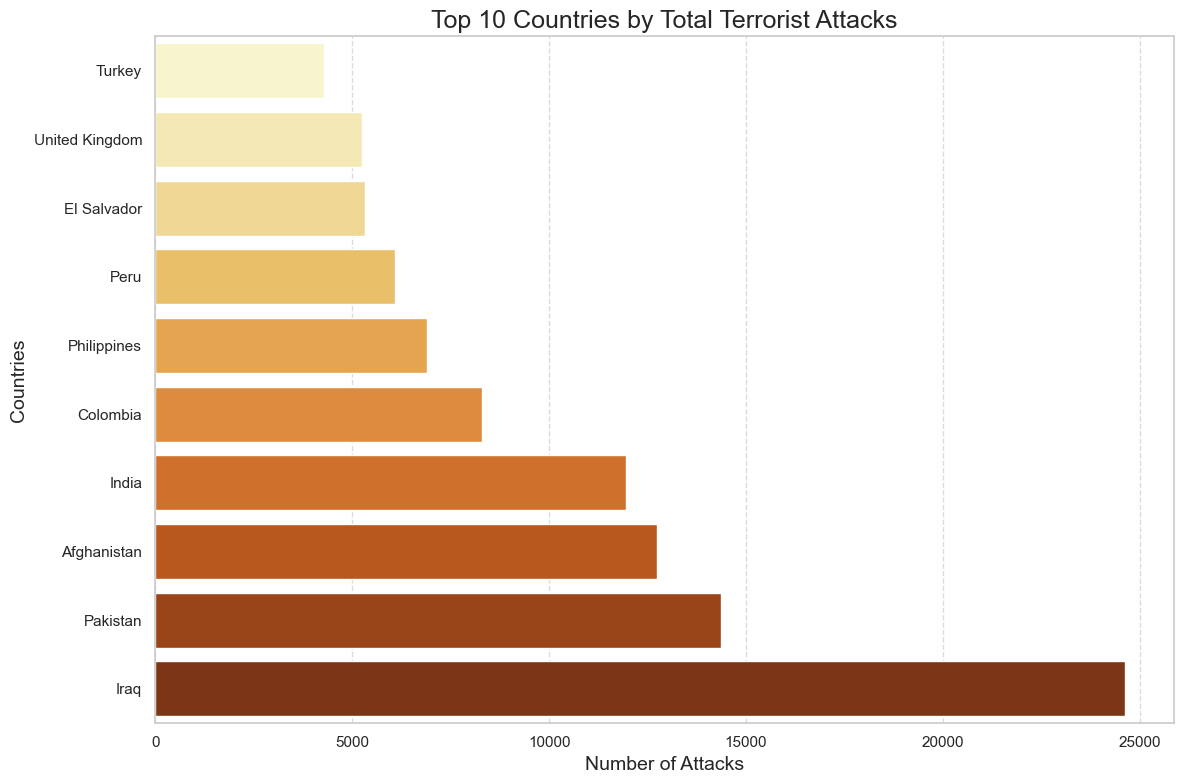

In [16]:
plt.figure(figsize=(12, 8))
top_countries = df['Country'].value_counts()[:10]
top_countries = top_countries[::-1]
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='YlOrBr')
plt.title('Top 10 Countries by Total Terrorist Attacks', fontsize=18)
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Countries', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the plot above, it's evident that Iraq, followed by Pakistan, had the highest number of terrorism incidents in 2017, and this trend also holds true for the entire period under consideration.

### Terrorist Incidents Across Regions

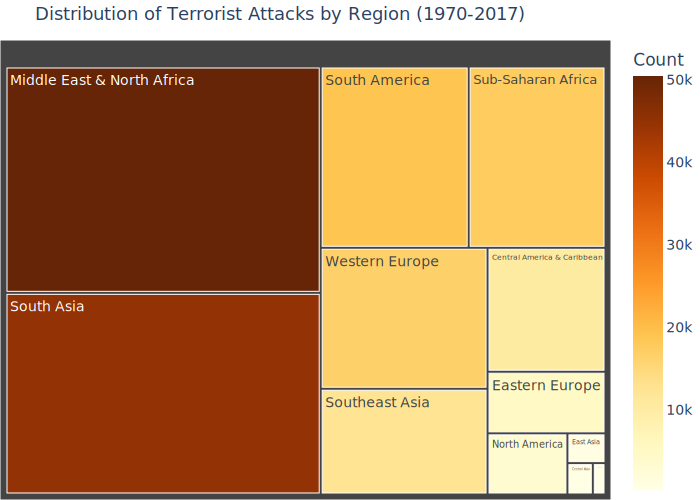

In [17]:
import plotly.express as px

# Calculating the count of attacks in each region
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Creating a treemap plot using Plotly Express
fig = px.treemap(region_counts, path=['Region'], values='Count', color='Count',
                 color_continuous_scale='YlOrBr', title='Distribution of Terrorist Attacks by Region (1970-2017)')

fig.update_layout(
    title_font_size=18,
    font_size=14,
    margin=dict(l=0, r=0, t=40, b=0)
)
fig.show("svg")

The regions with the most concentrated incidents recorded are the Middle East and South Asia.

### Analysis of Terrorism in Iraq

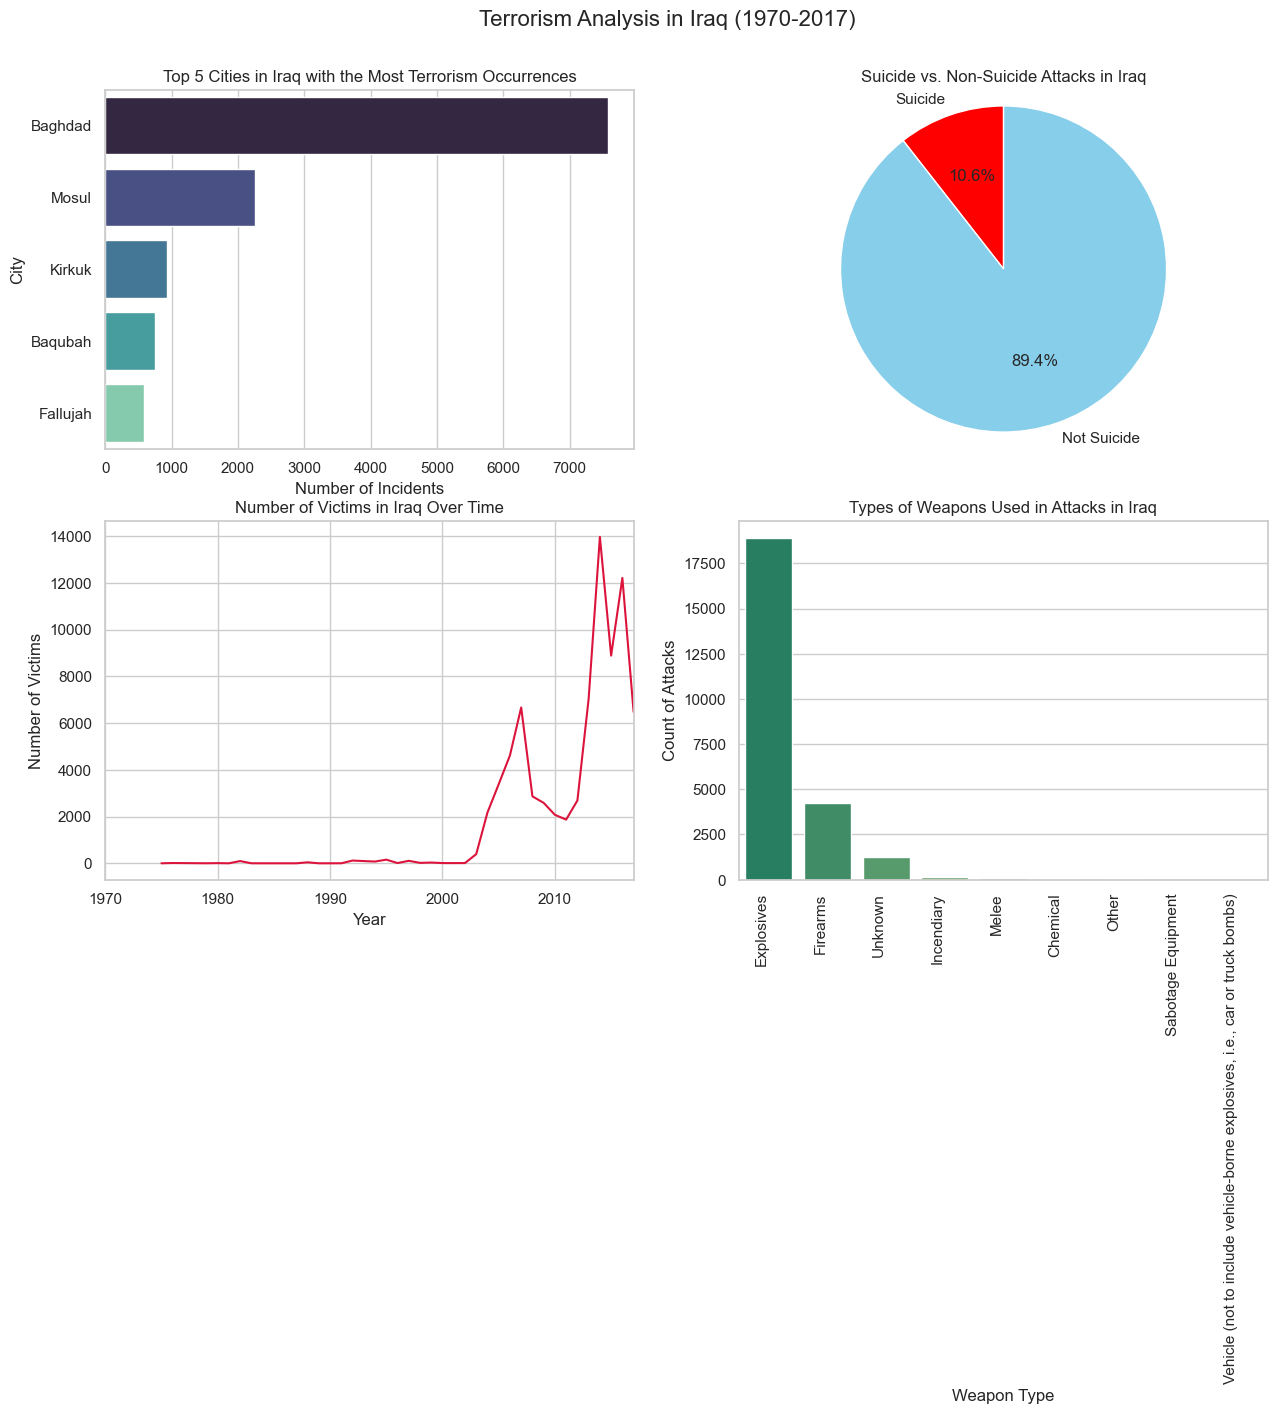

In [18]:
# Preparing the data for analysis
Iraq = df[df.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:5, ]
Iraq_suicide_size = Iraq['Suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']
Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]
Iraq_weapon = Iraq.groupby(by='Weapon Type', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :2]

# Creating subplots for different visualizations
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Subplot 1: Top 5 cities with the most terrorist incidents
sns.barplot(x='eventid', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0], palette='mako')
axs[0, 0].set_title('Top 5 Cities in Iraq with the Most Terrorism Occurrences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Number of Incidents')

# Subplot 2: Analysis of suicide attacks
colors = ['red', 'skyblue']
axs[0, 1].pie([Iraq_suicide_size, 1 - Iraq_suicide_size], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Suicide vs. Non-Suicide Attacks in Iraq')
axs[0, 1].axis('equal')  

# Subplot 3: Year-wise analysis of killed
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0], color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Number of Victims in Iraq Over Time')
axs[1, 0].set_ylabel('Number of Victims')
axs[1, 0].set_xlabel('Year')

# Subplot 4: Analysis of weapon types
sns.barplot(x='Weapon Type', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1], palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90, ha='right')
axs[1, 1].set_xlabel('Weapon Type')
axs[1, 1].set_ylabel('Count of Attacks')
axs[1, 1].set_title('Types of Weapons Used in Attacks in Iraq')

plt.suptitle('Terrorism Analysis in Iraq (1970-2017)', size=16)
plt.subplots_adjust(top=0.90)

plt.show()

Several insights can be derived regarding terrorism in Iraq between 1970 and 2017:

Top Affected Cities: The first plot shows the top five cities in Iraq with the highest number of terrorism occurrences. These cities are particularly vulnerable to terrorist activities, with Baghdad being the most affected.

Suicide Attacks: The second plot reveals the suicide rate in terrorist attacks in Iraq. It demonstrates that while suicide attacks are not the majority, they still constitute a significant portion of terrorist incidents.

Victims Over Time: The third plot presents the number of victims in Iraq over the years. It highlights that there has been a fluctuating trend in the number of victims, with some years experiencing significantly higher casualties than others.

Weapons Used: The fourth plot displays the types of weapons used in terrorist attacks in Iraq. It provides insights into the arsenal of terrorist groups and which types of weapons are more commonly employed.

High Incidence of Terrorism: Collectively, these visualizations underscore the persistent and significant threat of terrorism in Iraq over the analyzed period. Baghdad and other major cities remain at high risk, and the use of suicide attacks is notable. The casualty rate fluctuates over time, indicating the volatile security situation in the country.

## Insights Gained from Exploratory Data Analysis (EDA) of Global Terrorism:

1. The highest number of attacks occurred in the year 2014.
2. The preferred method of attack was bombings/explosions.
3. The Middle East and South Asia regions were the most heavily targeted.
4. Private citizens and property were the most frequently targeted categories.
5. Iraq experienced the highest number of terrorist attacks among all countries.